In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles



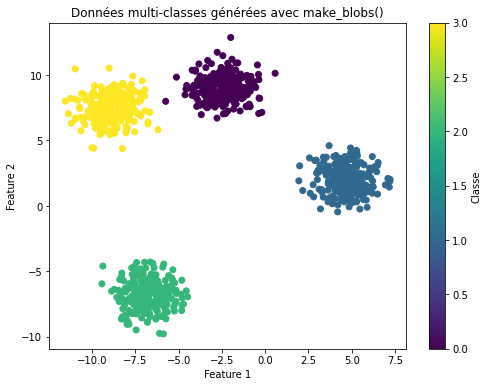

In [4]:

# Création des données avec make_blobs()
X, y = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=42)

# Affichage des données
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Données multi-classes générées avec make_blobs()')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Classe')
plt.show()


n général, lorsque les classes dans un dataset ne peuvent pas être séparées par une simple ligne droite, le problème nécessite une fonction non linéaire pour la séparation. Cela est particulièrement vrai lorsque les classes sont mélangées ou présentent une structure complexe dans l'espace des features.

Dans notre cas, puisque nous avons généré les données avec make_blobs() avec 4 classes, il est fort probable que les classes ne soient pas linéairement séparables. Cela signifie qu'une fonction non linéaire sera probablement nécessaire pour séparer efficacement les classes dans cet ensemble de données.

En conclusion, ce dataset nécessiterait probablement une fonction non linéaire pour séparer ses classes en raison de la présence de plusieurs classes et de la complexité de leur arrangement dans l'espace des features.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles d'apprentissage et de test
print("Dimensions de X_train :", X_train.shape)
print("Dimensions de y_train :", y_train.shape)
print("Dimensions de X_test :", X_test.shape)
print("Dimensions de y_test :", y_test.shape)

Dimensions de X_train : (800, 2)
Dimensions de y_train : (800,)
Dimensions de X_test : (200, 2)
Dimensions de y_test : (200,)


## une architecture basée sur FCNN

In [11]:
from keras.utils import to_categorical

# Convert class vectors to binary class matrices (one-hot encoding)
num_classes = 4  
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model_multiclass = Sequential()

model_multiclass.add(Dense(20, activation='relu', input_shape=(2,)))


model_multiclass.add(Dense(20, activation='relu'))

model_multiclass.add(Dense(4, activation='softmax'))


model_multiclass.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_multiclass = model_multiclass.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
25/25 [==============================] - 3s 28ms/step - loss: 1.5282 - accuracy: 0.5013 - val_loss: 0.8536 - val_accuracy: 0.6200
Epoch 2/100
25/25 [==============================] - 0s 12ms/step - loss: 0.6638 - accuracy: 0.7387 - val_loss: 0.5179 - val_accuracy: 0.7750
Epoch 3/100
25/25 [==============================] - 0s 9ms/step - loss: 0.4608 - accuracy: 0.8963 - val_loss: 0.3860 - val_accuracy: 0.9900
Epoch 4/100
25/25 [==============================] - 0s 9ms/step - loss: 0.3430 - accuracy: 0.9950 - val_loss: 0.2911 - val_accuracy: 1.0000
Epoch 5/100
25/25 [==============================] - 0s 8ms/step - loss: 0.2531 - accuracy: 0.9987 - val_loss: 0.2086 - val_accuracy: 1.0000
Epoch 6/100
25/25 [==============================] - 0s 8ms/step - loss: 0.1655 - accuracy: 0.9987 - val_loss: 0.1224 - val_accuracy: 1.0000
Epoch 7/100
25/25 [==============================] - 0s 9ms/step - loss: 0.1070 - accuracy: 1.0000 - val_loss: 0.0881 - val_accuracy: 1.0000
Epoch 8/100

135387/135387 [==============================] - 349s 3ms/step


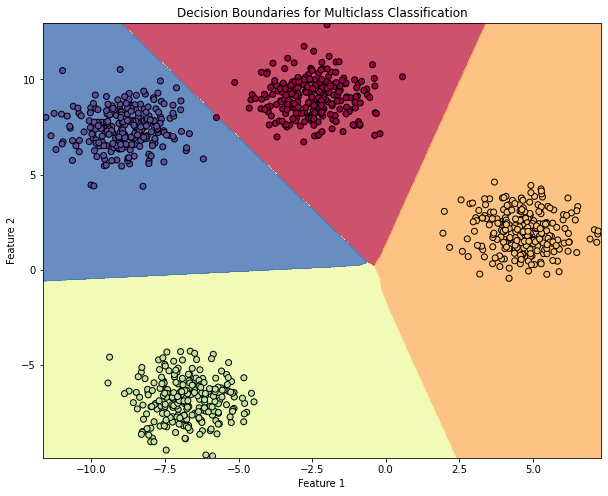

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generate meshgrid for decision boundary plotting
h = 0.01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class probabilities for each point in meshgrid
Z = model_multiclass.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

# Plot decision boundaries with different background colors for each class
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

# Plot the dataset with different colors for each class
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries for Multiclass Classification')
plt.show()


Accuracy:
Accuracy measures the proportion of correctly classified instances among all instances. An accuracy of 1.0 means that all instances in the test set were classified correctly by the model.

Precision:
Precision measures the proportion of instances predicted as positive that are actually positive. A precision of 1.0 means that all instances predicted as positive were indeed positive, and there were no false positives.

Recall:
Recall measures the proportion of actual positive instances that were correctly identified by the model. A recall of 1.0 means that the model correctly identified all positive instances in the test set, and there were no false negatives.

F1 Score:
The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is particularly useful when classes are imbalanced. An F1 score of 1.0 indicates perfect precision and recall balance.

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_test_multiclass = np.argmax(y_test, axis=1)
y_pred = model_multiclass.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)


accuracy = accuracy_score(y_test_multiclass, y_pred)
precision = precision_score(y_test_multiclass, y_pred, average='weighted')
recall = recall_score(y_test_multiclass, y_pred, average='weighted')
f1 = f1_score(y_test_multiclass, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test_multiclass, y_pred)
class_report = classification_report(y_test_multiclass, y_pred)

print("Accuracy :", accuracy)
print("Precision :", precision)
print("Recall :", recall)
print("F1 Score :", f1)
print("Confusion Matrix :\n", conf_matrix)
print("Classification Report :\n", class_report)


7/7 [==============================] - 0s 2ms/step
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1 Score : 1.0
Confusion Matrix :
 [[49  0  0  0]
 [ 0 41  0  0]
 [ 0  0 53  0]
 [ 0  0  0 57]]
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        57

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## Augmenter la dataset

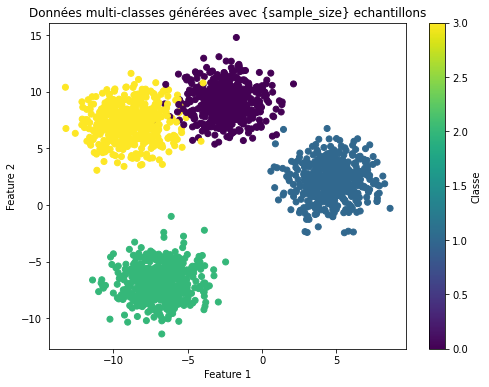

13/13 [==============================] - 0s 2ms/step


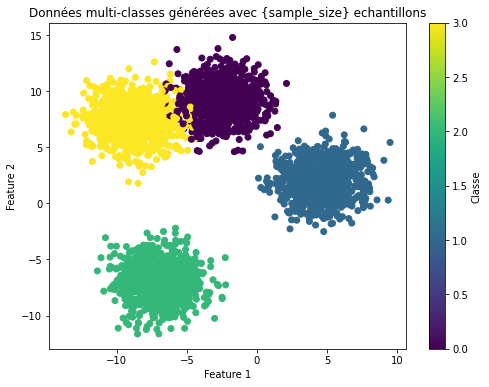

25/25 [==============================] - 0s 1ms/step


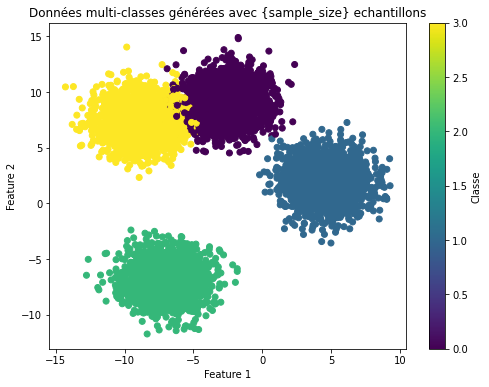

50/50 [==============================] - 0s 2ms/step


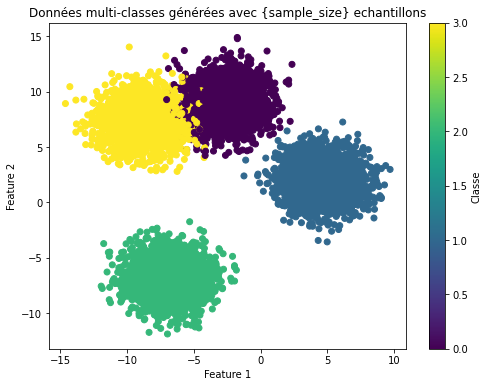

63/63 [==============================] - 0s 1ms/step


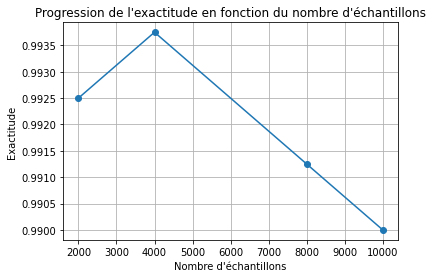

In [36]:



# Définir une plage de valeurs pour le nombre d'échantillons
sample_sizes = [ 2000, 4000, 8000, 10000]

# Liste pour stocker les valeurs d'exactitude
accuracies = []

# Modèle FCNN
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(2,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Génération et entraînement pour chaque taille de dataset
for sample_size in sample_sizes:
    # Générer le dataset
    X, y = make_blobs(n_samples=sample_size, n_features=2, centers=4, cluster_std=1.5, random_state=42)
    # Affichage des données
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.title('Données multi-classes générées avec {sample_size} echantillons')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Classe')
    plt.show()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Entraîner le modèle
    model.fit(X_train, to_categorical(y_train, 4), epochs=100, verbose=0)
    
    # Prédire et calculer l'exactitude
    y_pred = np.argmax(model.predict(X_test), axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Afficher la courbe de progression de l'exactitude en fonction du nombre d'échantillons
plt.plot(sample_sizes, accuracies, marker='o')
plt.title("Progression de l'exactitude en fonction du nombre d'échantillons")
plt.xlabel('Nombre d\'échantillons')
plt.ylabel('Exactitude')
plt.grid(True)
plt.show()
